In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift

In [2]:
df=pd.read_csv("2months.csv",parse_dates=['Date Time'],header=int(0))

In [3]:
df.head()

,Date Time,Water Level,Sigma,I,L
0,2017-01-01 00:00:00,1.322,0.059,0,0
1,2017-01-01 01:00:00,1.739,0.075,0,0
2,2017-01-01 02:00:00,2.096,0.085,0,0
3,2017-01-01 03:00:00,2.477,0.079,0,0
4,2017-01-01 04:00:00,2.392,0.082,0,0


In [4]:
df.describe()

,Water Level,Sigma,I,L
count,1416.000000,1416.000000,1416.0,1416.0
mean,1.426113,0.079972,0.0,0.0
std,0.968462,0.083728,0.0,0.0
min,-1.243000,0.010000,0.0,0.0
25%,0.753250,0.026000,0.0,0.0
50%,1.457000,0.043000,0.0,0.0
75%,2.072500,0.102750,0.0,0.0
max,4.944000,0.561000,0.0,0.0


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Date Time       0
 Water Level    0
 Sigma          0
 I              0
 L              0
dtype: int64

In [6]:
df.columns=['Date Time','Water Level','Sigma','I','L']

In [7]:
df1=df.loc[abs(df['Water Level']) < 0.09]

In [8]:
df1.head()

,Date Time,Water Level,Sigma,I,L
21,2017-01-01 21:00:00,0.082,0.062,0,0
47,2017-01-02 23:00:00,-0.013,0.059,0,0
195,2017-01-09 03:00:00,-0.062,0.299,0,0
198,2017-01-09 06:00:00,-0.079,0.312,0,0
220,2017-01-10 04:00:00,-0.066,0.030,0,0


In [9]:
df.tail()

,Date Time,Water Level,Sigma,I,L
1411,2017-02-28 19:00:00,0.358,0.020,0,0
1412,2017-02-28 20:00:00,-0.056,0.020,0,0
1413,2017-02-28 21:00:00,-0.581,0.026,0,0
1414,2017-02-28 22:00:00,-0.413,0.016,0,0
1415,2017-02-28 23:00:00,0.351,0.030,0,0


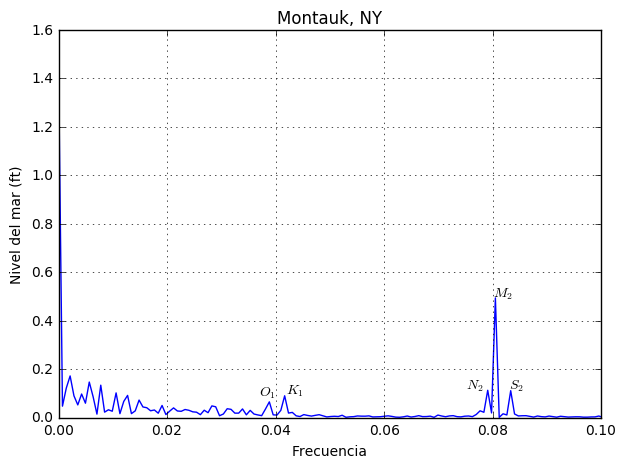

In [10]:
N = 1416
T =  1
y = df['Water Level']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(0,0.1)
plt.title('Montauk, NY')
plt.xlabel('Frecuencia')
plt.ylabel('Nivel del mar (ft)')
plt.text(0.08,0.5,'$M_{2}$')
plt.text(0.083,0.12,'$S_{2}$')
plt.text(0.075,0.12,'$N_{2}$')
plt.text(0.042,.1,'$K_{1}$')
plt.text(0.037,0.09,'$O_{1}$')
plt.grid()
fig=plt.gcf()
fig.set_size_inches(7,5)
plt.show()